# Image Classification for Fashion-MNIST 
## Modlel: CNN

<h1>Importing Libraries 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

import numpy as np
import sklearn
from sklearn import metrics
import pandas as pd

import time

import tensorflow as tf
import tensorflow.keras as keras

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

<h1> Load Dataset 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

<h1>Dimensions Check for Train and Test and Reshape 4D array for CNN Model

In [3]:
print('ALL Train Set Dimension:' , x_train.shape,y_train.shape)
print('Test Set Dimension:' , x_test.shape,y_test.shape)


ALL Train Set Dimension: (60000, 28, 28) (60000,)
Test Set Dimension: (10000, 28, 28) (10000,)


<h1>Visualizing the data

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
def show_images(n_rows, n_cols, x, y, class_names):

    plt.figure(figsize = (n_cols*2, n_rows*2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols*row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x[index], cmap ="binary", interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y[index]])
    plt.show()

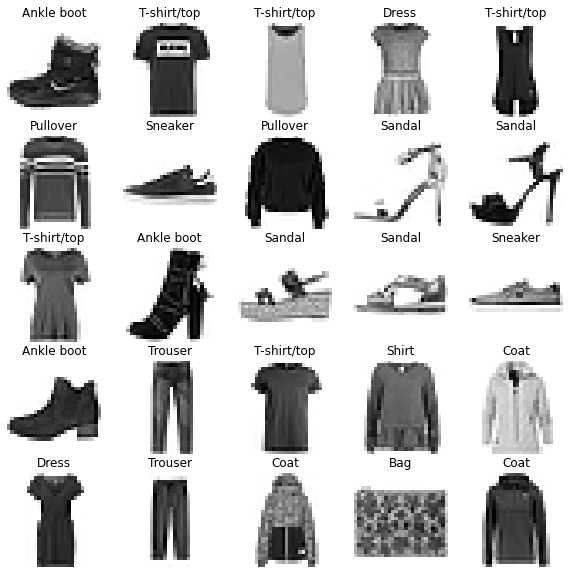

In [6]:
show_images(5, 5, x_train, y_train, class_names)

<h1>Distribution of Dataset
<h2>Check if the Sample's Ditribution is Skewed

In [7]:
pd.Series(y_train).value_counts()


9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [8]:
pd.Series(y_test).value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

<h1>Reshape the input into 4D array for CNN model
    

In [9]:
# reshape the input into 4D array for CNN model

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[1], 1)


print('\nTrain Set Reshaped Dimension:', x_train.shape)
print('Test Set Reshaped Dimension:',x_test.shape)


Train Set Reshaped Dimension: (60000, 28, 28, 1)
Test Set Reshaped Dimension: (10000, 28, 28, 1)


<h1>Normalization
<h2>Min_Max_Scaler &  one-hot encoding

In [10]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255


In [11]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)


print(y_train.shape)
print(y_test.shape)


(60000, 10)
(10000, 10)


<h1>Construct CNN Model

In [12]:

# size of pooling area for max pooling
pool_size = (2, 2)

# convolution kernel size
kernel_size = (3, 3)


In [13]:
model = keras.models.Sequential()


model.add(Conv2D(filters=32, kernel_size=(kernel_size[0], kernel_size[1]), 
                 activation='relu', strides=1, padding='same', data_format='channels_last', 
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(pool_size[0], pool_size[1])))
model.add(BatchNormalization())

    
    
model.add(Conv2D(filters=128, kernel_size=(kernel_size[0], kernel_size[1]), 
                 activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(pool_size[0], pool_size[1])))
model.add(BatchNormalization())
model.add(Dropout(0.25))



model.add(Flatten())


model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 128)         0

<h1>Compiling Model

In [15]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
#Loss Function and compile
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
#Early Stopping 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
#Save the best model
checkpointer = ModelCheckpoint(filepath="save/cnn_mnist.hdf5", verbose=0, save_best_only=True)

<h1>Fitting Model

In [17]:
start = time.time()

history = model.fit(x_train,y_train, validation_split=0.2, callbacks=[monitor,checkpointer],
                    verbose=1,epochs=50, batch_size=128, shuffle=True)      

end = time.time()
cnn_mnist_time = end-start
print("Total training time is {:0.2f} minute".format(cnn_mnist_time/60.0))

Epoch 1/50
375/375 [==============================] - 29s 75ms/step - loss: 0.7155 - accuracy: 0.7615 - val_loss: 1.4039 - val_accuracy: 0.4701
Epoch 2/50
375/375 [==============================] - 26s 70ms/step - loss: 0.3356 - accuracy: 0.8810 - val_loss: 0.2624 - val_accuracy: 0.9053
Epoch 3/50
375/375 [==============================] - 27s 71ms/step - loss: 0.2659 - accuracy: 0.9030 - val_loss: 0.2381 - val_accuracy: 0.9133
Epoch 4/50
375/375 [==============================] - 26s 70ms/step - loss: 0.2346 - accuracy: 0.9177 - val_loss: 0.2370 - val_accuracy: 0.9127
Epoch 5/50
375/375 [==============================] - 27s 72ms/step - loss: 0.2164 - accuracy: 0.9220 - val_loss: 0.2468 - val_accuracy: 0.9108
Epoch 6/50
375/375 [==============================] - 27s 71ms/step - loss: 0.1944 - accuracy: 0.9292 - val_loss: 0.2552 - val_accuracy: 0.9072
Epoch 7/50
375/375 [==============================] - 27s 71ms/step - loss: 0.1776 - accuracy: 0.9356 - val_loss: 0.2071 - val_accuracy:

<h1>Plot the Learning Curves

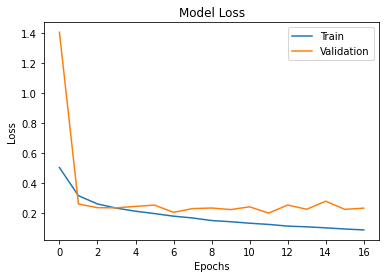

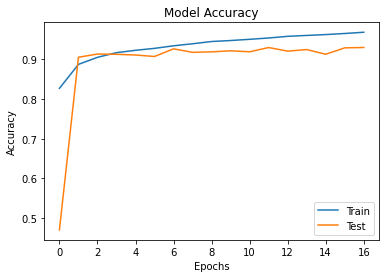

In [18]:
#Loss Curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
#Acccuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

<h1>Model Evaluation on Test Set

In [19]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.2607 - accuracy: 0.9253
Loss: 0.2607
Accuracy: 0.9253


In [20]:
model.load_weights("save/cnn_mnist.hdf5")

<h1>Confusion Matrix

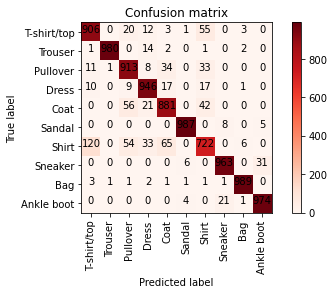

In [21]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test,axis=1)
#Confusion Matrix
cm = metrics.confusion_matrix(y_true, y_pred_class)
#Plotting
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
for i, j in itertools.product(range(10), range(10)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



<h1>Interpretation of Performance Measures(Precision / Recall/ F1-Score)

In [22]:
print(metrics.classification_report(y_true, y_pred_class,target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.91      0.88      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.91      0.89      1000
       Dress       0.91      0.95      0.93      1000
        Coat       0.88      0.88      0.88      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.83      0.72      0.77      1000
     Sneaker       0.97      0.96      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



<h1>Visualizing the Prediction Results on Test Set

In [23]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [24]:
# Choose 5 Incorret Labels for each class
incorrect = []
for j in range(len(class_names)):
#     print(j)
    for i in range(len(y_test)):

        if y_true[i]==j and y_pred_class[i] != y_true[i]:
#             print(y_true[i],y_pred_class[i])

            incorrect.append(i)
        
        if(len(incorrect) == 5*(j+1)):
            break
# len(incorrect)

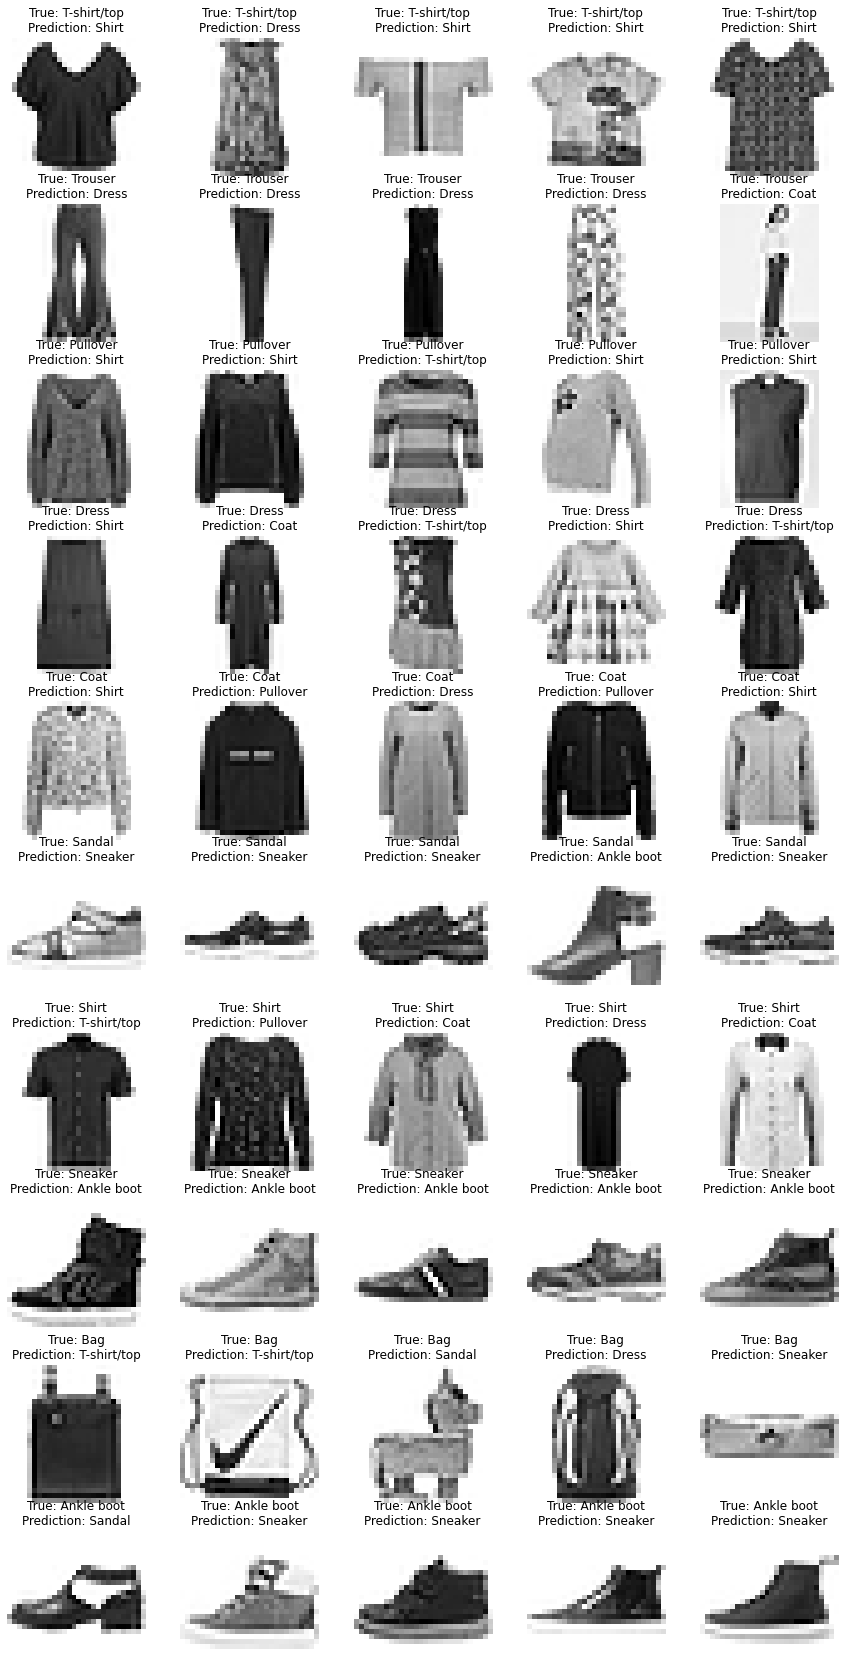

In [25]:
n_cols=5
n_rows=10
plt.figure(figsize = (n_cols*3, n_rows*3))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(x_test[incorrect[index]], cmap ="binary", interpolation = 'nearest')
#         print(incorrect[index])
        plt.axis('off')
        plt.title('True: {}'.format(class_names[y_true[incorrect[index]]])+'\nPrediction: {}'.format(class_names[y_pred_class[incorrect[index]]]))

plt.show()